<a href="https://colab.research.google.com/github/mt-470/data-470-capstone/blob/master/Capstone_ETHEREUM_mTobolewski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Madeline Tobolewski

DATA 470 - Dr. Manilich

16 December 2019

Capstone Paper

# **An Analysis of the Ethereum and Ethereum Classic Blockchains**

Ethereum is a cryptocurrency platform dependent on smart contracts. Ethereum is operated by its cryptocurrency, Ether or ETH, and is used to build and execute smart contracts and distributed autonomous applications, or DApps (Ethereum 2019). It is able to do this all without a centralized authority, censorship, or third-party requirements. Two years after the launch of Ethereum, the creators and users of the platform decided to create the Decentralized Autonomous Organization, or DAO. The DAO was built to act as a decentralized venture capital fund for decentralized crypto projects. The idea was to make a stateless decentralized organization with no board of directors or employees but instead would use independent investors as its key actors. 1 Not long after that, a crucial flaw the DAO code was exploited by hackers, and they lost over $50 million. This led to an outcry in the cryptocurrency online world, especially among DAO investors, and more specifically among members of the Ethereum community. This largely negative reaction was mainly because such a large sum of money raised by investors was taken right out the DAO’s account (Ethereum 2019). This left some individuals presuming that Ethereum blockchain itself was hacked and the project had failed. To understand the Ethereum cryptocurrency we know today, it is important to analyze its predecessor, Ethereum Classic. 
Background

*__Background__* 

The intention of this project is to analyze the elements of popular cryptocurrency blockchains to better understand their network structures and operations. The primary focus of this study is the Ethereum blockchain network, while acknowledging the Bitcoin network consistently as a comparable blockchain application in which to compare the network structures. Ethereum and Bitcoin both use the Nakamoto consensus to regulate their blockchains’ transaction serialization and are similar architecturally. Primary differences in the two cryptocurrencies include their APIs, abstractions, and wire protocol (Gencer, et al. 2018).
Blockchain technologies have been quickly extending their presence among a variety of industries, not the least of which includes the financial sector and cryptocurrency markets. This rapid expansion and implementation of blockchain has proven its potential to be altered and adopted by any company or organization seeking to more securely transfer, verify, and log data. In the writing, Blockchain Technology: Beyond Bitcoin, Crosby et al. describes blockchain as, 

> *Essentially, a distributed database of records, or public ledger of all transactions or digital events that have been executed and shared among participating parties. Each transaction in the public ledger is verified by consensus of a majority of the participants in the system. Once entered, information can never be erased. The blockchain contains a certain and verifiable record of every single transaction ever made. (Crosby, et al. 2016)*


The creation of the cryptocurrency, Bitcoin, in 2009 and the creation of blockchain are synonymous, and in recent years the success of Bitcoin has inspired other companies and individuals to jump onto the blockchain bandwagon. Most of these other projects aim to build onto the foundation of the Bitcoin network itself to leverage the high value placed in the system and the vast amount of computation that goes into the consensus mechanism (Wood n.d.).


The Ethereum, a cryptocurrency introduced in 2015, is a decentralized virtual machine, which can execute programs – called contracts – written in a Turing-complete bytecode language, called Ethereum Virtual Machine (EVM) (Wood n.d.) (Bartoletti, Carta, et al. 2019). Every contract has a permanent storage where to keep data, and a set of functions which can be invoked either by users or by other contracts. Users and contracts can own a cryptocurrency (called ether, or ETH), and send/receive ether to/from users or other contracts (Bartoletti, Carta, et al. 2019). The Ethereum blockchain is similar in a variety of ways to the Bitcoin blockchain, although there are significant differences. The main difference between Ethereum and Bitcoin, in regard to the blockchain architecture, is that Ethereum blocks contain a copy of both the transaction list and the most recent state, while Bitcoin only blocks only contain a copy of the transaction list. Aside from that, two other values, the block number and the difficulty, are also stored in the block (Chinchilla 2019).


The first exploration into the concept of smart contracts was done in the late 1990s, and it showed clear potential to support the algorithmic enforcement of agreements.  However, until very recently, in 2015, no specific system was proposed to create or implement such a system. Smart contracts are distributed programs that control the flow of the digital currency, Ether, and allow for expressing a broad spectrum of financial applications. No new concept goes unaffected by negative implications, as the significant semantic complexity increases the risk of programming errors (Grishchenko, Maffei and Schneidewind 2018). 


In the research piece, Dissecting Ponzi schemes on Ethereum: Identification, analysis, and impact, by Bartoletti, Carta et al. explain the process in which transactions are initiated and executed, as well as how contracts are tied into the process. The process is broken down as follows:

> Users can send transactions to the Ethereum network in order to: (i) create new contracts; (ii) invoke a function of a contract; (iii) transfer ether to contracts or to other users. All the transactions sent by users, called external transactions, are recorded on a public, append-only data structure — the blockchain. Upon receiving an external transaction, a contract can fire some internal transactions, which are not explicitly recorded on the blockchain, but still have effects on the balance of users and of other contracts. (Bartoletti, Carta, et al. 2019)

An understanding of the contract execution code and the heightened possibility for security risks is paramount to analyzing the Ethereum blockchain data. However, the analyzation of smart contracts is difficult for a few reasons. The first being that Ethereum smart contracts are developed in Solidity, a language which features transaction-oriented mechanisms and a number of non-standard semantic behaviors. Additionally, smart contracts are uploaded onto a blockchain in the form of EVM bytecode, a stack-based low-level code featuring dynamic code creation and execution, and, generally, minimal static information (Bartoletti, Carta, et al. 2019).


These concerns in mind, Ethereum is still particularly notable due to the varied potential of the smart contracts’ functionality. The ability to be implemented many ways ranging from public cryptocurrency markets to permissioned consortium business-logic practices makes it even more vital to have insight into the process of hashing and transaction information. Also, I wanted to analyze the DAO Smart Contract before and after the DAO Hack and the resulting hard fork.  

*__Methodology & Analysis__*

To analyze the data from the aforementioned datasets, I used the Google Colaboratory to run Jupyter Notebooks. In the notebooks I used a series of SQL functions to query the information from Google BigQuery. 

The first thing I wanted to visualize were the top miners, ranked by rewards, in the last thirty days. To accomplish this, I ran the following SQL command:


```
blocks_ETC = client.query('''
WITH mined_block AS (
  SELECT miner, DATE(timestamp)
  FROM `bigquery-public-data.crypto_ethereum_classic.blocks` 
  WHERE DATE(timestamp) > DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH)
  ORDER BY miner ASC)
SELECT miner, COUNT(miner) AS total_block_reward 
FROM mined_block 
GROUP BY miner 
ORDER BY total_block_reward ASC
''')
```




The above query produced an output for the Ethereum Classic data. After running the command for Ethereum as well, I used Plotly for Python to make a pie chart. 

#### Ethereum Classic – Top 30 Miners by Rewards

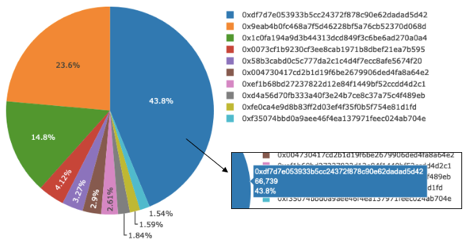

This plot displays the top thirty miners by reward. Of these thirty, it is observed that three of the miners hold a significant amount, well over the majority, of the rewards. 



Next, I wanted to create a visual which helped to depict the top miners, ordered by block reward, of all time. To do this, I plotted the total rewards of every miners who has ever mined Ethereum Classic from the genesis block. I also limited this query to just miners whose daily block rewards are greater than one hundred. I did this because one hundred is still relatively low for a miner, especially one that is active. In doing this I tried to sort out the more “active” miners from those who are likely outliers. 

#### Ethereum Classic – Top Miners of All Time (Ordered by Block Rewards) 
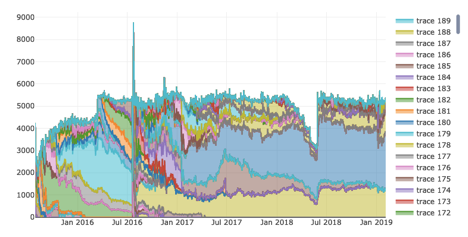

In the above chart, there is a noticeable spike June of 2016. This is immediately following the DAO hard fork after the code exploitation. It is unclear by there was such a spike in activity for some miners rather than others. It could be that many miners did not want to partake anymore, and those who stayed picked up so much activity that they had a great reward from that. Likewise, in September of 2018 there is a very noticeable drop in all miner rewards. Speculation could suggest this is related to the updated name “Constantinople”.

Next I pulled the information for the “Top 20” most well-reward miners. Also referred to as a *rich list*. In pulling these top 20 miners, we can analyze common patterns and behaviors of these machines. 

#### Ethereum Classic – Top Miners 20 Miners (by reward total)
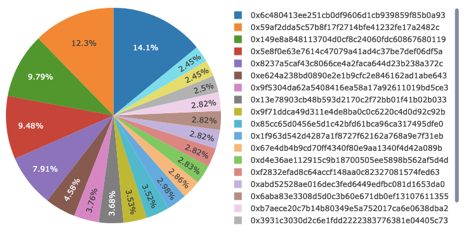

Lastly, I analyzed the daily hash rate. Hash rate is a measure of difficulty over block time. This is measured by getting the delta time of each block timestamp from the previous block timestamp. This is "averaged" out by day. That is, the query can average out all difficulty and delta times per day and divide them by one another. I further divide by 1 billion to get the GH/s.

#### Ethereum and Ethereum Classic – Hash Rate (January 2016 – December 2019)
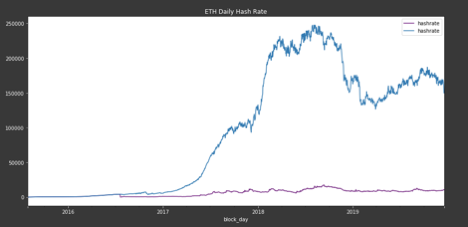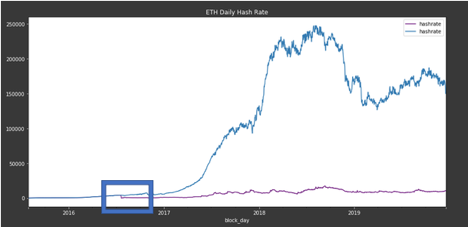

The graph above depicts Ethereum (ETH) in blue and Ethereum Classic (ETC) in purple. The area emphasize by the blue box is expanded on in the line graph below.

#### Ethereum Classic – Hash Rate (Jan 2016 – Jan 2019)
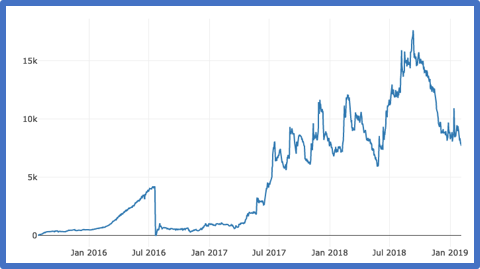

What is being shown above is the drop in the Ethereum Class hash rate before and after the hard fork in 2016. As seen above, the hash rate declines to nearly zero, and fluctuates around the 1,500 mark for most of the next year. Only in July of 2017 do we see Ethereum Class begin to be used much more frequently. However, as is shown above, Ethereum is used so much more frequently now that Ethereum Classic is difficult to chart out on the same area. 

*__Conclusion__*

Overall, it was more difficult than initially anticipated to compare the two versions of the Ethereum cryptocurrency. Although the datasets are set up so similarly with the same column headers and dataset types, the disparity in usage was quite significant. This difference made visualizations and direct comparisons difficult, which is why the focus was more-so placed on Ethereum Classic rather than both equally. I found that there was a significant drop in usage, particularly the hash rate and miner rewards rate post-hard fork. The hard fork taught the cryptocurrency community a lot, as well as stirring up many forms of online debates. Whether or not one views the *new* Ethereum as a “pure form” of blockchain is up for debate. However, what isn’t up for debate is that the future of blockchain technology is endless, and this one use-case of hard forking is only the beginning of patching blockchain vulnerabilities and applying this to modern life. 

### *References*

> Bartoletti, Massimo, Salvatore Carta, Tiziana Cimoli, and Roberto Saia. 2019. "Dissecting Ponzi schemes on Ethereum: Identification, analysis, and impact." Future Generation Computer Systems (Dipartimento di Matematica e Informatica, Università degli Studi di Cagliari, Italy) 102 (2020): 259-277.

> Bartoletti, Massimo, Stefano Lande, and Livio Pompianu . 2017. "A general framework for blockchain analytics." SERIAL’17: ScalablE and Resilient InfrAstructures for distributed Ledgers, December.

> Chinchilla, Chris. 2019. "A Next-Generation Smart Contract and Decentralized Application Platform." GitHub. June. Accessed October 2019. https://github.com/ethereum/wiki/wiki/White-Paper.

> Crosby, Michael, Nachiappan, Pradan Pattanayak, Sanjeev Verma, and Vignesh Kalyanaraman. 2016. "BlockChain Technology: Beyond Bitcoin." AIR: Applied Innovation Review, June.

> Ethereum (ETH) vs Ethereum Classic (ETC): What’s the Difference? 2019. COINSUTRA. September 6. Astra – Bitcoin Community. https://coinsutra.com/ethereum-vs-ethereum-classic/

> Gencer, Adam Efe, Soumya Basu, Ittay Eyal, Robbert van Renesse, and Emin Gun Sirer. 2018. "Decentralization in Bitcoin and Ethereum Networks." Financial Cryptography and Data Security (FC) 2018 (Cryptovest).

> Grishchenko, I., M. Maffei, and C. Schneidewind. 2018. "Foundations and Tools for the Static Analysis of Ethereum Smart Contracts." Computer Aided Verification, July 18: 51-78.

> Tikhomirov, S., E. Voskresenskaya, I. Ivanitsky, R. Takhaviev, E. Marchenko, and Y. Alexandrov. 2018. "SmartCheck: Static Analysis of Ethereum Smart Contracts." IEEE/ACM 1st International Workshop on Emerging Trends in Software Engineering for Blockchain (WETSEB), August 27: 9-16.

> Wood, Gavin. n.d. "ETHEREUM: A SECURE DECENTRALISED GENERALISED TRANSACTION LEDGER." Ethereum & Ethercore.

____________________


# Installations + Setup

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
import numpy as np
import pandas as pd
import os
from google.cloud import bigquery
!pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [0]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True) 

In [0]:
project_id = 'practical-lodge-253418'

In [0]:
client = bigquery.Client(project=project_id)



# Top Miners By Rewards in the Last 30 Days
Find out who are the top miners by the address of the block mined in the last 30 days.

## **ETHEREUM-CLASSIC**

In [0]:
blocks_ETC = client.query('''
WITH mined_block AS (
  SELECT miner, DATE(timestamp)
  FROM `bigquery-public-data.crypto_ethereum_classic.blocks` 
  WHERE DATE(timestamp) > DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH)
  ORDER BY miner ASC)
SELECT miner, COUNT(miner) AS total_block_reward 
FROM mined_block 
GROUP BY miner 
ORDER BY total_block_reward ASC
''')

In [0]:
query = ("""
WITH mined_block AS (
  SELECT miner, DATE(timestamp)
  FROM `bigquery-public-data.crypto_ethereum_classic.blocks` 
  WHERE DATE(timestamp) > DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH)
  ORDER BY miner ASC)
SELECT miner, COUNT(miner) AS total_block_reward 
FROM mined_block 
GROUP BY miner 
ORDER BY total_block_reward DESC
LIMIT 10
""")

query_job = client.query(query)
iterator = query_job.result()


In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_miners = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
# Look at the first 10 headlines
top_miners.head(10)

,miner,total_block_reward
0,0xdf7d7e053933b5cc24372f878c90e62dadad5d42,65101
1,0x1c0fa194a9d3b44313dcd849f3c6be6ad270a0a4,34701
2,0x9eab4b0fc468a7f5d46228bf5a76cb52370d068d,29908
3,0x0073cf1b9230cf3ee8cab1971b8dbef21ea7b595,10659
4,0x004730417cd2b1d19f6be2679906ded4fa8a64e2,6433
5,0xd144e30a0571aaf0d0c050070ac435deba461fab,4069
6,0x60f814acce2b2129707228c61065696bcc3e8b9f,3721
7,0x904db9b94455fd4491cc83081785bf82de8a0306,3242
8,0x5253b33c1313a4449bc5304a9c55b4cc2bdf2872,2821
9,0xe0b2f8516590f2fb2c41db44c94371414fc9eb60,2768


### Plotting the top miners by their block reward as a pie chart.

In [0]:
labels = top_miners['miner']
values = top_miners['total_block_reward']

trace = go.Pie(labels=labels, values=values)

iplot([trace])

## **ETHEREUM**

In [0]:
blocks_ETC = client.query('''
WITH mined_block AS (
  SELECT miner, DATE(timestamp)
  FROM `bigquery-public-data.crypto_ethereum.blocks` 
  WHERE DATE(timestamp) > DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH)
  ORDER BY miner ASC)
SELECT miner, COUNT(miner) AS total_block_reward 
FROM mined_block 
GROUP BY miner 
ORDER BY total_block_reward ASC
''')

In [0]:
query = ("""
WITH mined_block AS (
  SELECT miner, DATE(timestamp)
  FROM `bigquery-public-data.crypto_ethereum.blocks` 
  WHERE DATE(timestamp) > DATE_SUB(CURRENT_DATE(), INTERVAL 1 MONTH)
  ORDER BY miner ASC)
SELECT miner, COUNT(miner) AS total_block_reward 
FROM mined_block 
GROUP BY miner 
ORDER BY total_block_reward DESC
LIMIT 10
""")

query_job = client.query(query)
iterator = query_job.result()

In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_miners = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
# Look at the first 10 headlines
top_miners.head(10)

,miner,total_block_reward
0,0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c,53109
1,0xea674fdde714fd979de3edf0f56aa9716b898ec8,36554
2,0x829bd824b016326a401d083b33d092293333a830,18512
3,0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5,12765
4,0x04668ec2f57cc15c381b461b9fedab5d451c8f7f,8681
5,0xb2930b35844a230f00e51431acae96fe543a0347,5210
6,0xd224ca0c819e8e97ba0136b3b95ceff503b79f53,2786
7,0xaa5c4244f05c92781c4f259913319d8ba1acf05e,2677
8,0xeea5b82b61424df8020f5fedd81767f2d0d25bfb,2283
9,0x005e288d713a5fb3d7c9cf1b43810a98688c7223,1862


### Plotting the top miners by their block reward as a pie chart.

In [0]:
labels = top_miners['miner']
values = top_miners['total_block_reward']

trace = go.Pie(labels=labels, values=values)

iplot([trace])

# Top Miners By Block Rewards All Time
Plot the total rewards of everyone who has ever mined Ethereum Classic from the genesis block. Limit it to just miners who's daily block rewards are greater than 100. 

## **ETHEREUM-CLASSIC**

In [0]:
query = ('''
SELECT miner, 
    DATE(timestamp) as date,
    COUNT(miner) as total_block_reward
FROM `bigquery-public-data.crypto_ethereum_classic.blocks` 
GROUP BY miner, date
HAVING COUNT(miner) > 100
ORDER BY date, COUNT(miner) ASC
"""
query_job = client.query(query)
iterator = query_job.result()
''')


In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_miners_by_date = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
top_miners_by_date.head(10)

In [0]:
date_series = top_miners_by_date['date'].unique()
date_series

In [0]:
traces = []
miner_series = top_miners_by_date['miner'].unique()

for index, miner in enumerate(miner_series):
    miner_reward_by_date = top_miners_by_date.loc[top_miners_by_date['miner'] == miner]
    miner_reward = miner_reward_by_date['total_block_reward']
    miner_date = miner_reward_by_date['date']
    trace = dict(
        x=miner_date,
        y=miner_reward,
        mode='lines',
        stackgroup='one'
    )
    traces.append(trace)
fig = dict(data=traces)

iplot(fig)

## **ETHEREUM**

In [0]:
query = ('''
SELECT miner, 
    DATE(timestamp) as date,
    COUNT(miner) as total_block_reward
FROM `bigquery-public-data.crypto_ethereum.blocks` 
GROUP BY miner, date
HAVING COUNT(miner) > 100
ORDER BY date, COUNT(miner) ASC
"""
query_job = client.query(query)
iterator = query_job.result()
''')


In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_miners_by_date = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
top_miners_by_date.head(10)

In [0]:
date_series = top_miners_by_date['date'].unique()
date_series

In [0]:
traces = []
miner_series = top_miners_by_date['miner'].unique()

for index, miner in enumerate(miner_series):
    miner_reward_by_date = top_miners_by_date.loc[top_miners_by_date['miner'] == miner]
    miner_reward = miner_reward_by_date['total_block_reward']
    miner_date = miner_reward_by_date['date']
    trace = dict(
        x=miner_date,
        y=miner_reward,
        mode='lines',
        stackgroup='one'
    )
    traces.append(trace)
fig = dict(data=traces)

iplot(fig)

# Latest Daily Balance of Ethereum Classic (Top 20 Rich List)
The latest daily balance for Ethereum Classic. Ordered by balance, getting us a nice rich list we can plot.

## **ETHEREUM-CLASSIC**

In [0]:
query = ('''
with double_entry_book as (
    -- debits
    select to_address as address, value as value
    from `bigquery-public-data.crypto_ethereum_classic.traces`
    where to_address is not null
    and status = 1
    and (call_type not in ('delegatecall', 'callcode', 'staticcall') or call_type is null)
    union all
    -- credits
    select from_address as address, -value as value
    from `bigquery-public-data.crypto_ethereum_classic.traces`
    where from_address is not null
    and status = 1
    and (call_type not in ('delegatecall', 'callcode', 'staticcall') or call_type is null)
    union all
    -- transaction fees debits
    select miner as address, sum(cast(receipt_gas_used as numeric) * cast(gas_price as numeric)) as value
    from `bigquery-public-data.crypto_ethereum_classic.transactions` as transactions
    join `bigquery-public-data.crypto_ethereum_classic.blocks` as blocks on blocks.number = transactions.block_number
    group by blocks.miner
    union all
    -- transaction fees credits
    select from_address as address, -(cast(receipt_gas_used as numeric) * cast(gas_price as numeric)) as value
    from `bigquery-public-data.crypto_ethereum_classic.transactions`
)
select address, 
sum(value) / 1000000000 as balance
from double_entry_book
group by address
order by balance desc
limit 20
''')

query_job = client.query(query)
iterator = query_job.result()

In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_address_rich_list = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
top_address_rich_list.head(10)

In [0]:
labels = top_address_rich_list['address']
values = top_address_rich_list['balance']

trace = go.Pie(labels=labels, values=values)

iplot([trace])

## **ETHEREUM**

In [0]:
query = ('''
with double_entry_book as (
    -- debits
    select to_address as address, value as value
    from `bigquery-public-data.crypto_ethereum.traces`
    where to_address is not null
    and status = 1
    and (call_type not in ('delegatecall', 'callcode', 'staticcall') or call_type is null)
    union all
    -- credits
    select from_address as address, -value as value
    from `bigquery-public-data.crypto_ethereum_classic.traces`
    where from_address is not null
    and status = 1
    and (call_type not in ('delegatecall', 'callcode', 'staticcall') or call_type is null)
    union all
    -- transaction fees debits
    select miner as address, sum(cast(receipt_gas_used as numeric) * cast(gas_price as numeric)) as value
    from `bigquery-public-data.crypto_ethereum_classic.transactions` as transactions
    join `bigquery-public-data.crypto_ethereum_classic.blocks` as blocks on blocks.number = transactions.block_number
    group by blocks.miner
    union all
    -- transaction fees credits
    select from_address as address, -(cast(receipt_gas_used as numeric) * cast(gas_price as numeric)) as value
    from `bigquery-public-data.crypto_ethereum_classic.transactions`
)
select address, 
sum(value) / 1000000000 as balance
from double_entry_book
group by address
order by balance desc
limit 20
''')

query_job = client.query(query)
iterator = query_job.result()

In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
top_address_rich_list = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
top_address_rich_list.head(10)

In [0]:
labels = top_address_rich_list['address']
values = top_address_rich_list['balance']

trace = go.Pie(labels=labels, values=values)

iplot([trace])

# Daily Hashrate
Hashrate is a measure of difficulty over block time. This is measured by getting the delta time of each block timestamp from the previous block timestamp. This is "averaged" out by day. That is, the query can average out all difficulty and delta times per day and divide them by one another. I further divide by 1 billion to get the GH/s.

## **ETHEREUM-CLASSIC**

In [0]:
query = ('''
WITH block_rows AS (
  SELECT *, ROW_NUMBER() OVER (ORDER BY timestamp) AS rn
  FROM `bigquery-public-data.crypto_ethereum_classic.blocks`
),
delta_time AS (
  SELECT
  mp.timestamp AS block_time,
  mp.difficulty AS difficulty,
  TIMESTAMP_DIFF(mp.timestamp, mc.timestamp, SECOND) AS delta_block_time
  FROM block_rows mc
  JOIN block_rows mp
  ON mc.rn = mp.rn - 1
),
hashrate_book AS (
  SELECT TIMESTAMP_TRUNC(block_time, DAY) AS block_day,
  AVG(delta_block_time) as daily_avg_block_time,
  AVG(difficulty) as daily_avg_difficulty
  FROM delta_time
  GROUP BY TIMESTAMP_TRUNC(block_time, DAY)
)
SELECT block_day,
(daily_avg_difficulty/daily_avg_block_time)/1000000000 as hashrate
FROM hashrate_book
ORDER BY block_day ASC
''')

query_job = client.query(query)
iterator = query_job.result()

In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
daily_hashrate = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
daily_hashrate.head(10)

In [0]:
trace = go.Scatter(
    x=daily_hashrate['block_day'],
    y=daily_hashrate['hashrate'],
    mode='lines'
)
data = [trace]
iplot(data)

## **ETHEREUM**

In [0]:
query = ('''
WITH block_rows AS (
  SELECT *, ROW_NUMBER() OVER (ORDER BY timestamp) AS rn
  FROM `bigquery-public-data.crypto_ethereum.blocks`
),
delta_time AS (
  SELECT
  mp.timestamp AS block_time,
  mp.difficulty AS difficulty,
  TIMESTAMP_DIFF(mp.timestamp, mc.timestamp, SECOND) AS delta_block_time
  FROM block_rows mc
  JOIN block_rows mp
  ON mc.rn = mp.rn - 1
),
hashrate_book AS (
  SELECT TIMESTAMP_TRUNC(block_time, DAY) AS block_day,
  AVG(delta_block_time) as daily_avg_block_time,
  AVG(difficulty) as daily_avg_difficulty
  FROM delta_time
  GROUP BY TIMESTAMP_TRUNC(block_time, DAY)
)
SELECT block_day,
(daily_avg_difficulty/daily_avg_block_time)/1000000000 as hashrate
FROM hashrate_book
ORDER BY block_day ASC
''')

query_job = client.query(query)
iterator = query_job.result()

In [0]:
rows = list(iterator)
# Transform the rows into a nice pandas dataframe
daily_hashrate = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))
daily_hashrate.head(10)

In [0]:
trace = go.Scatter(
    x=daily_hashrate['block_day'],
    y=daily_hashrate['hashrate'],
    mode='lines'
)
data = [trace]
iplot(data)

# Other

In [0]:
blocks_ETH = client.query('''
  SELECT DATE(timestamp) as date, number, miner, difficulty, total_difficulty, size, gas_limit, gas_used, transaction_count
  FROM `bigquery-public-data.crypto_ethereum.blocks`
  WHERE DATE(timestamp) >= "2016-01-01" AND DATE(timestamp) < "2019-10-31" ''').to_dataframe()

In [0]:
blocks_ETC = client.query('''
  SELECT DATE(timestamp) as date, number, miner, difficulty, total_difficulty, size, gas_limit, gas_used, transaction_count
  FROM `bigquery-public-data.crypto_ethereum_classic.blocks`
  WHERE DATE(timestamp) >= "2016-01-01" AND DATE(timestamp) < "2019-10-31" ''').to_dataframe()

In [0]:
blocks_ETH.head()

In [0]:
blocks_ETH.describe()

In [0]:
trans_ETH = client.query('''
  SELECT DATE(timestamp) as date, number, miner, difficulty, total_difficulty, size, gas_limit, gas_used, transaction_count
  FROM `bigquery-public-data.crypto_ethereum.transactions`
  WHERE DATE(timestamp) >= "2016-01-01" AND DATE(timestamp) < "2019-10-31" ''').to_dataframe()